### 데이터 불러오기 및 전처리

In [ ]:
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

full_day_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/full_day_train.csv')
full_day_vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/full_day_vali.csv')
full_day_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/full_day_test.csv')

In [ ]:
full_day_train_clus = full_day_train.iloc[:,1:4]

In [ ]:
full_day_train_clus = full_day_train_clus.sort_values(by=['대여 대여소번호', '일자'])

In [ ]:
full_day_train_clus

,대여 대여소번호,일자,대여수
99,102,2019-06-01,138
100,102,2019-06-02,144
101,102,2019-06-03,163
102,102,2019-06-04,184
103,102,2019-06-05,136
...,...,...,...
137286,3536,2020-12-27,33
137285,3536,2020-12-28,40
137284,3536,2020-12-29,33
137283,3536,2020-12-30,21


In [ ]:
full_day_train_clus = full_day_train_clus.set_index('일자')
full_day_train_clus2 = full_day_train_clus.iloc[:,1]
full_day_train_clus2

일자
2019-06-01    138
2019-06-02    144
2019-06-03    163
2019-06-04    184
2019-06-05    136
             ... 
2020-12-27     33
2020-12-28     40
2020-12-29     33
2020-12-30     21
2020-12-31     26
Name: 대여수, Length: 137802, dtype: int64

In [ ]:
full_day_train_clus2 = full_day_train_clus2.to_numpy()
full_day_train_clus_2 = full_day_train_clus2.reshape(238, 579, 1)
full_day_train_clus_2

array([[[138],
        [144],
        [163],
        ...,
        [ 50],
        [ 30],
        [ 31]],

       [[269],
        [196],
        [157],
        ...,
        [ 25],
        [ 16],
        [ 19]],

       [[ 94],
        [ 78],
        [111],
        ...,
        [ 21],
        [ 12],
        [ 13]],

       ...,

       [[ 82],
        [ 73],
        [ 99],
        ...,
        [ 27],
        [ 24],
        [ 26]],

       [[376],
        [365],
        [230],
        ...,
        [ 54],
        [ 39],
        [ 51]],

       [[ 62],
        [ 59],
        [ 53],
        ...,
        [ 33],
        [ 21],
        [ 26]]])

In [ ]:
pip install tslearn

     |████████████████████████████████| 793 kB 9.0 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

### cluster 5

In [ ]:
km = TimeSeriesKMeans(n_clusters=5, 
                      metric="dtw", 
                      max_iter=5,
                      random_state=42)
prediction5 = km.fit_predict(full_day_train_clus_2)
prediction5

array([0, 0, 1, 4, 0, 1, 1, 1, 1, 4, 3, 4, 4, 1, 4, 0, 1, 4, 4, 0, 2, 0,
       1, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 0, 1, 4, 4, 4, 4, 0, 4,
       4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 2, 0, 1, 1, 4, 4, 4, 4, 4,
       1, 4, 1, 0, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1,
       4, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 1, 0, 4, 1, 1,
       1, 0, 4, 1, 4, 4, 1, 1, 0, 1, 4, 1, 1, 4, 0, 4, 0, 4, 4, 4, 4, 0,
       1, 0, 1, 4, 1, 4, 0, 0, 0, 4, 1, 4, 4, 1, 1, 4, 1, 1, 0, 1, 4, 4,
       1, 4, 1, 1, 4, 1, 4, 4, 1, 0, 0, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 4,
       1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 0, 4, 1, 0, 1,
       4, 4, 1, 1, 1, 4, 1, 0, 0, 0, 4, 1, 1, 1, 4, 0, 1, 4, 4, 1, 4, 1,
       1, 4, 0, 3, 1, 1, 1, 4, 4, 4, 1, 0, 4, 4, 1, 1, 0, 1])

In [ ]:
len(prediction5)

238

In [ ]:
clusclus = pd.DataFrame(full_day_train.iloc[:,1].unique())
predictionclus5 = pd.DataFrame(prediction5)
clusclusclus = pd.concat([clusclus, predictionclus5], axis=1)
clusclusclus.columns = ['대여 대여소번호', 'clus']
clusclusclus.head()

,대여 대여소번호,clus
0,102,0
1,106,0
2,107,1
3,116,4
4,117,0


In [ ]:
full_day_train_clus5 = full_day_train_clus.reset_index()
clus5 = pd.merge(full_day_train_clus5, clusclusclus, how = 'left',on = '대여 대여소번호')
clus5 = clus5.set_index('일자')

In [ ]:
import seaborn as sns
aaa5 = clus5[clus5['clus']==0]
aaa5 = aaa5.reset_index()
aaa5

,일자,대여 대여소번호,대여수,clus
0,2019-06-01,102,138,0
1,2019-06-02,102,144,0
2,2019-06-03,102,163,0
3,2019-06-04,102,184,0
4,2019-06-05,102,136,0
...,...,...,...,...
19681,2020-12-27,3533,75,0
19682,2020-12-28,3533,81,0
19683,2020-12-29,3533,54,0
19684,2020-12-30,3533,39,0


In [ ]:
hahaha5_0 = pd.DataFrame(aaa5.iloc[:, :3])
hahaha5_0

,일자,대여 대여소번호,대여수
0,2019-06-01,102,138
1,2019-06-02,102,144
2,2019-06-03,102,163
3,2019-06-04,102,184
4,2019-06-05,102,136
...,...,...,...
19681,2020-12-27,3533,75
19682,2020-12-28,3533,81
19683,2020-12-29,3533,54
19684,2020-12-30,3533,39


In [ ]:
hahaha5_0['대여 대여소번호'] = hahaha5_0['대여 대여소번호'].astype(str)

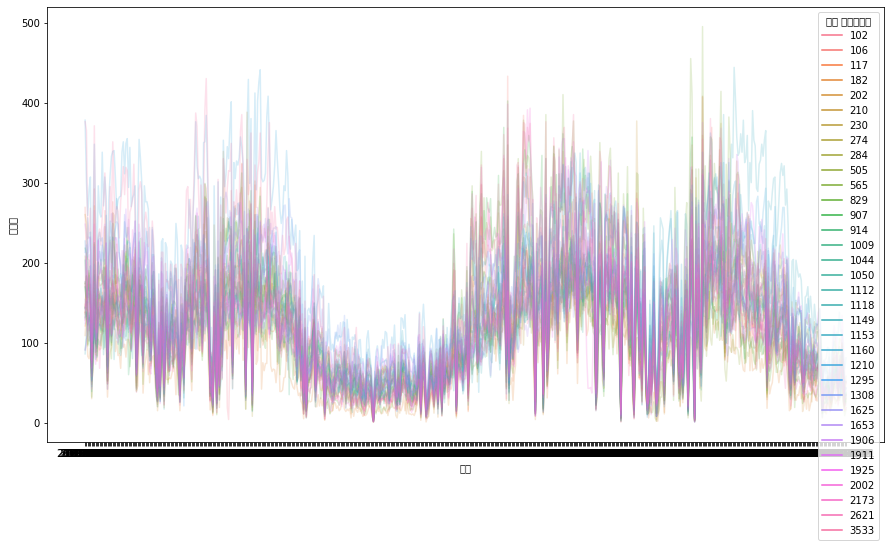

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=hahaha5_0, x='일자', y='대여수',  hue='대여 대여소번호', alpha=0.2)

In [ ]:
import math
clus5_0_mean = hahaha5_0.groupby(by=['일자']).mean()
clus5_0_sd = hahaha5_0.groupby(by=['일자']).std()

print(math.sqrt(clus5_0_sd.대여수.pow(2).mean()))
print(len(hahaha5_0['대여 대여소번호'].unique()))

41.51209786677552
34


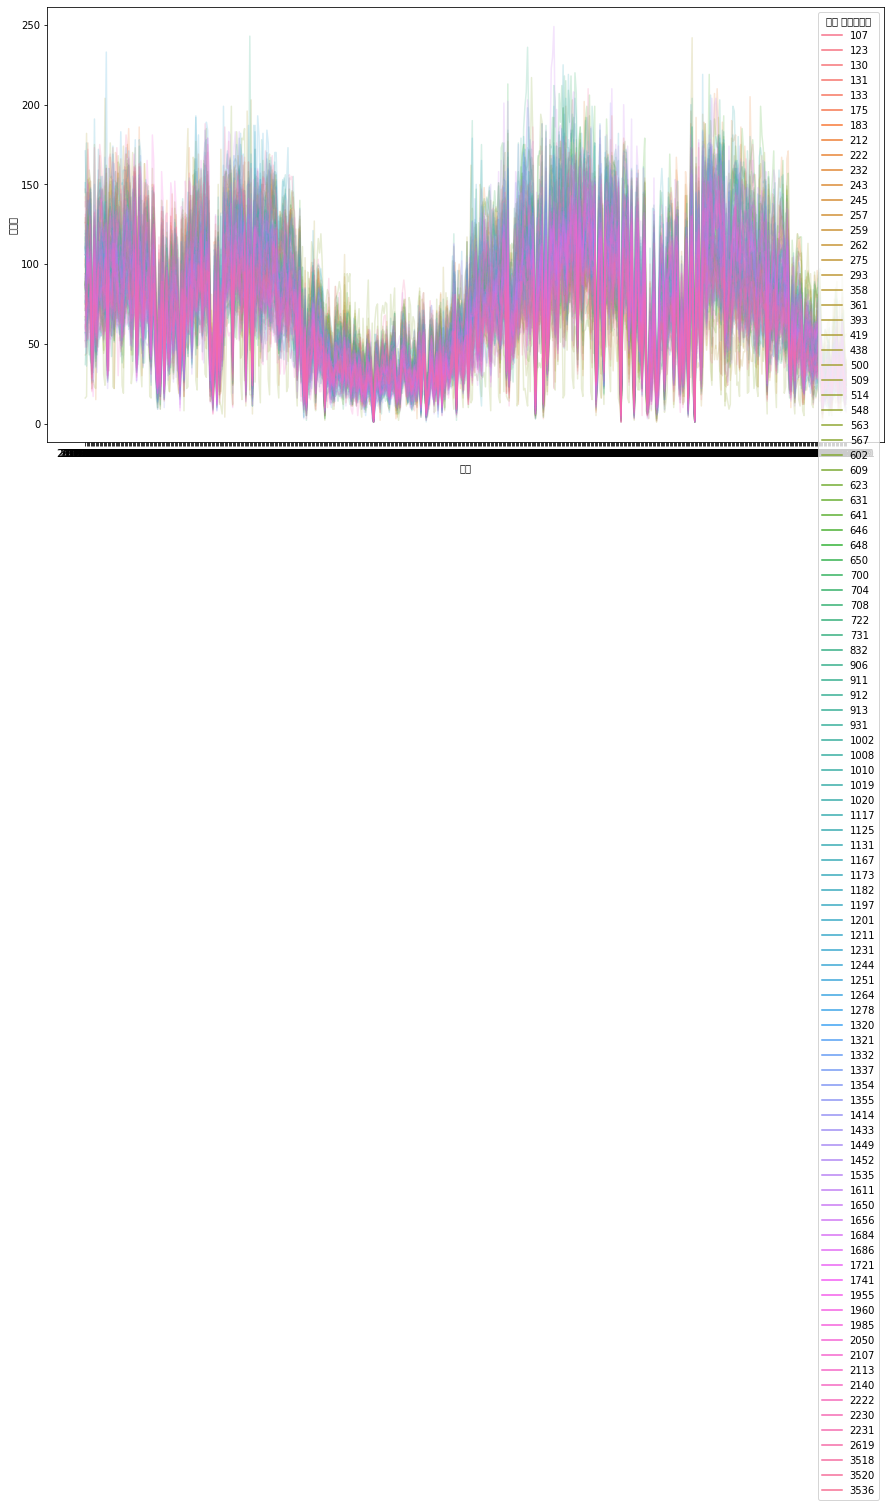

In [ ]:
# clus1
import seaborn as sns
aaa5_1 = clus5[clus5['clus']==1]
aaa5_1 = aaa5_1.reset_index()

hahaha5_1 = pd.DataFrame(aaa5_1.iloc[:, :3])
hahaha5_1['대여 대여소번호'] = hahaha5_1['대여 대여소번호'].astype(str)

plt.figure(figsize=(15,8))
sns.lineplot(data=hahaha5_1, x='일자', y='대여수',  hue='대여 대여소번호', alpha=0.2)

In [ ]:
clus5_1_mean = hahaha5_1.groupby(by=['일자']).mean()
clus5_1_sd = hahaha5_1.groupby(by=['일자']).std()

print(math.sqrt(clus5_1_sd.대여수.pow(2).mean()))
print(len(hahaha5_1['대여 대여소번호'].unique()))

21.787329024234232
98


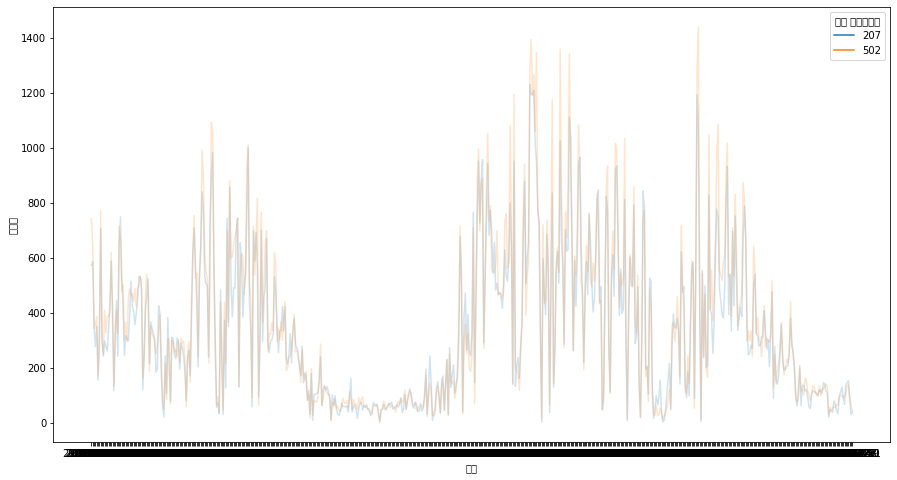

In [ ]:
import seaborn as sns
aaa5_2 = clus5[clus5['clus']==2]
aaa5_2 = aaa5_2.reset_index()

hahaha5_2 = pd.DataFrame(aaa5_2.iloc[:, :3])
hahaha5_2['대여 대여소번호'] = hahaha5_2['대여 대여소번호'].astype(str)

plt.figure(figsize=(15,8))
sns.lineplot(data=hahaha5_2, x='일자', y='대여수',  hue='대여 대여소번호', alpha=0.2)

In [ ]:
clus5_2_mean = hahaha5_2.groupby(by=['일자']).mean()
clus5_2_sd = hahaha5_2.groupby(by=['일자']).std()

print(math.sqrt(clus5_2_sd.대여수.pow(2).mean()))
print(len(hahaha5_2['대여 대여소번호'].unique()))

52.245930996580796
2


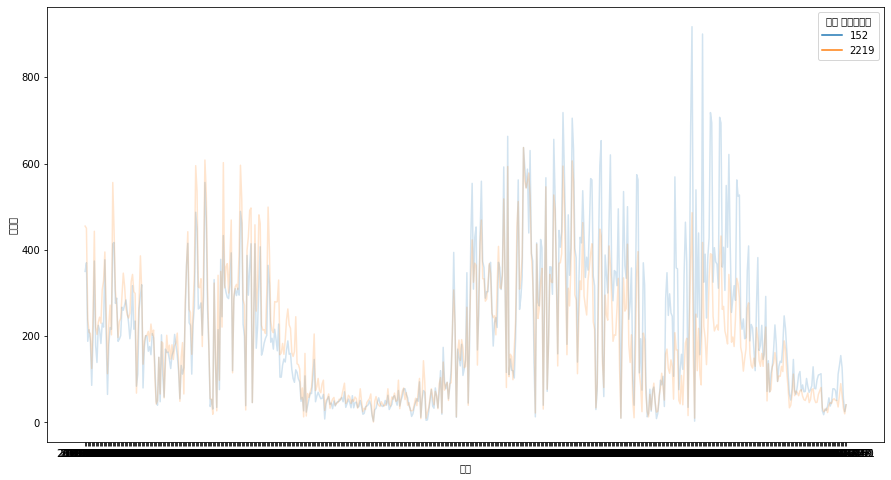

In [ ]:
import seaborn as sns
aaa5_3 = clus5[clus5['clus']==3]
aaa5_3 = aaa5_3.reset_index()

hahaha5_3 = pd.DataFrame(aaa5_3.iloc[:, :3])
hahaha5_3['대여 대여소번호'] = hahaha5_3['대여 대여소번호'].astype(str)

plt.figure(figsize=(15,8))
sns.lineplot(data=hahaha5_3, x='일자', y='대여수',  hue='대여 대여소번호', alpha=0.2)

In [ ]:
clus5_3_mean = hahaha5_3.groupby(by=['일자']).mean()
clus5_3_sd = hahaha5_3.groupby(by=['일자']).std()

print(math.sqrt(clus5_3_sd.대여수.pow(2).mean()))
print(len(hahaha5_3['대여 대여소번호'].unique()))

59.53186691086479
2


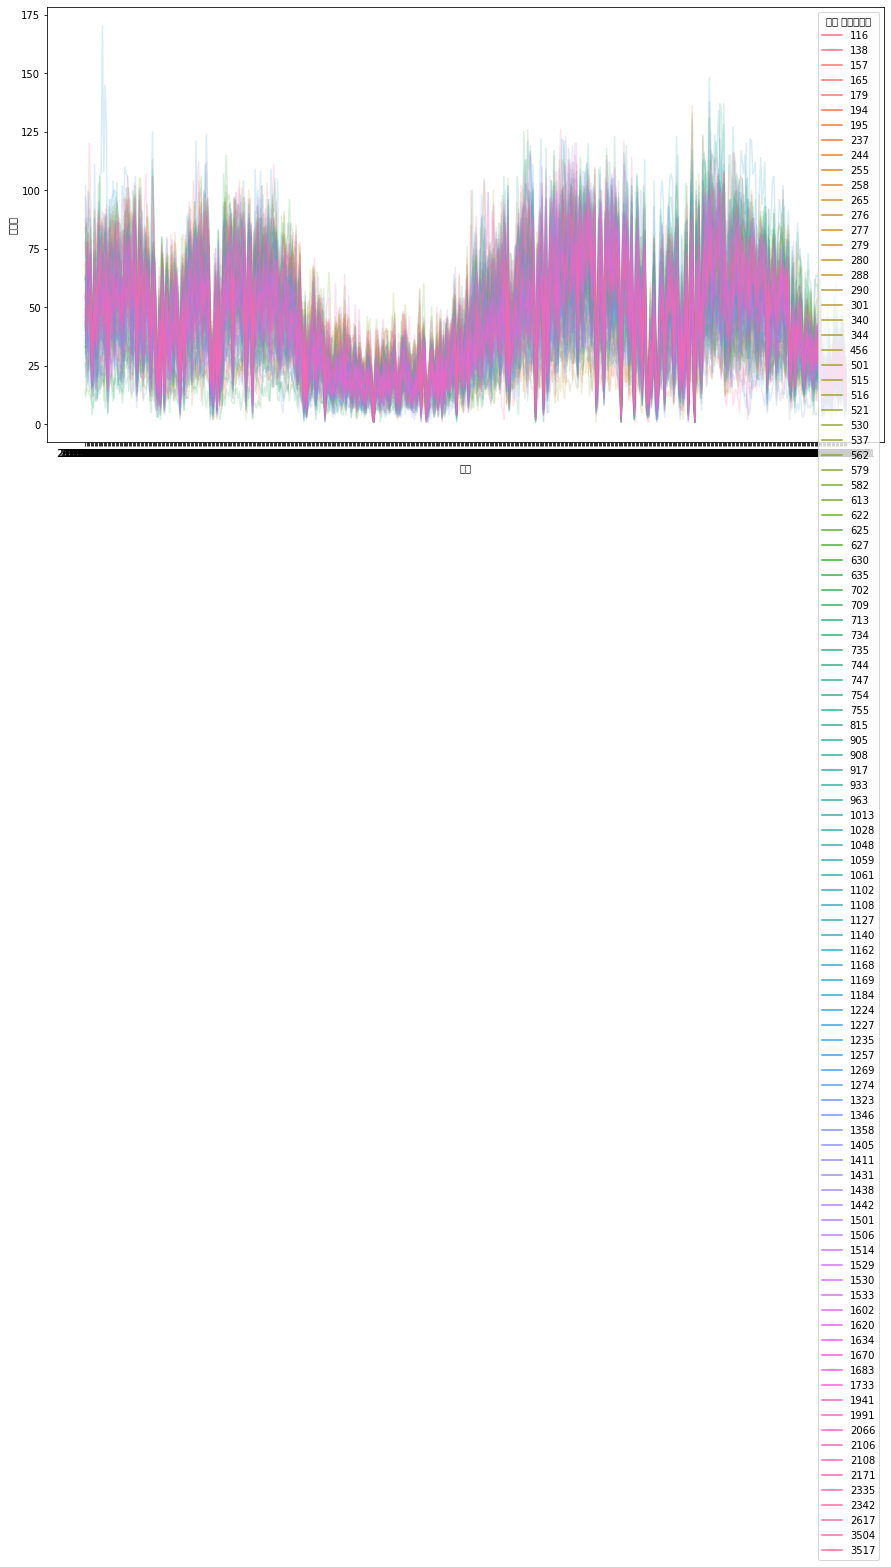

In [ ]:
import seaborn as sns
aaa5_4 = clus5[clus5['clus']==4]
aaa5_4 = aaa5_4.reset_index()

hahaha5_4 = pd.DataFrame(aaa5_4.iloc[:, :3])
hahaha5_4['대여 대여소번호'] = hahaha5_4['대여 대여소번호'].astype(str)

plt.figure(figsize=(15,8))
sns.lineplot(data=hahaha5_4, x='일자', y='대여수',  hue='대여 대여소번호', alpha=0.2)

In [ ]:
clus5_4_mean = hahaha5_4.groupby(by=['일자']).mean()
clus5_4_sd = hahaha5_4.groupby(by=['일자']).std()

print(math.sqrt(clus5_4_sd.대여수.pow(2).mean()))
print(len(hahaha5_4['대여 대여소번호'].unique()))

14.70487872665557
102


### 최적 군집 확정 및 각 군집 평균

In [ ]:
hahaha5_0.to_csv('train_raw_0.csv')
hahaha5_1.to_csv('train_raw_1.csv')
hahaha5_4.to_csv('train_raw_4.csv')

In [ ]:
hahaha5_1


,일자,대여 대여소번호,대여수
0,2019-06-01,107,94
1,2019-06-02,107,78
2,2019-06-03,107,111
3,2019-06-04,107,143
4,2019-06-05,107,92
...,...,...,...
56737,2020-12-27,3536,33
56738,2020-12-28,3536,40
56739,2020-12-29,3536,33
56740,2020-12-30,3536,21


### weather data 불러오기

In [ ]:
weather_train = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_season.csv')
weather_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_season.csv')

weather_train = weather_train.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])
weather_test = weather_test.drop(columns=['Unnamed: 0', '대여건수', '월', '일', '계절', '요일'])

weather_train['대여날짜'] = pd.to_datetime(weather_train['대여날짜'])
weather_test['대여날짜'] = pd.to_datetime(weather_test['대여날짜'])

weather_train = weather_train.rename(columns = {'대여날짜':'일자'})
weather_test = weather_test.rename(columns = {'대여날짜':'일자'})

In [ ]:
weather_vali = weather_train.iloc[580:,]
weather_train = weather_train.iloc[:580,]

In [ ]:
weather_train.shape

(580, 9)

In [ ]:
weather_vali.shape

(151, 9)

In [ ]:
weather_test.shape

(30, 9)

In [ ]:
weather_train

,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,일자,winter
0,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,2019-06-01,0
1,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,2019-06-02,0
2,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,2019-06-03,0
3,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,2019-06-04,0
4,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,2019-06-05,0
...,...,...,...,...,...,...,...,...,...
575,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,2020-12-27,1
576,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,2020-12-28,1
577,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,2020-12-29,1
578,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,2020-12-30,1


In [ ]:
weather_train['일자'] = weather_train['일자'].astype(str)

6개일 때 평균 sd가 가장 작았음

In [ ]:
final0_train = pd.merge(clus5_0_mean.reset_index(), weather_train, how='inner')
final1_train = pd.merge(clus5_1_mean.reset_index(), weather_train, how='inner')
final2_train = pd.merge(clus5_2_mean.reset_index(), weather_train, how='inner')
final3_train = pd.merge(clus5_3_mean.reset_index(), weather_train, how='inner')
final4_train = pd.merge(clus5_4_mean.reset_index(), weather_train, how='inner')

In [ ]:
final4_train

,일자,대여수,일최고기온,일최저기온,하늘상태,습도,강수확률,풍속,강수형태,winter
0,2019-06-01,51.598039,29.052632,29.052632,2,46.959459,5.067568,1.439189,0,0
1,2019-06-02,49.245098,30.315789,30.315789,2,50.270270,5.337838,1.657432,0,0
2,2019-06-03,52.931373,29.947368,29.947368,2,59.932432,12.770270,1.747297,0,0
3,2019-06-04,54.745098,28.631579,28.631579,3,64.695946,20.675676,1.635811,0,0
4,2019-06-05,52.313725,26.684211,26.684211,3,64.324324,38.783784,3.034459,0,0
...,...,...,...,...,...,...,...,...,...,...
574,2020-12-27,22.215686,4.789474,0.875000,3,70.709459,20.608108,2.230405,0,1
575,2020-12-28,27.852941,-1.789474,-6.500000,2,53.783784,14.797297,3.520946,0,1
576,2020-12-29,22.156863,-4.421053,-11.000000,2,46.317568,7.905405,3.205405,0,1
577,2020-12-30,14.117647,-1.894737,-8.750000,2,48.445946,10.472973,2.462838,0,1


In [ ]:
# 범주형변수 삭제
## 0, 1, 4 군집
final0_train_1 = final0_train[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']]
final0_train_1 = final0_train_1.set_index('일자')

final1_train_1 = final1_train[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']]
final1_train_1 = final1_train_1.set_index('일자')

final2_train_1 = final4_train[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']]
final2_train_1 = final2_train_1.set_index('일자')

# 2, 3 군집은 따로 분리
## 207
final3_train_1 = pd.merge(aaa5_2.iloc[:579, :3].reset_index(), weather_train, how='inner')
final3_train_1 = final3_train_1[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']].set_index('일자')

## 502
final4_train_1 = pd.merge(aaa5_2.iloc[579:, :3].reset_index(), weather_train, how='inner')
final4_train_1 = final4_train_1[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']].set_index('일자')

## 152
final5_train_1 = pd.merge(aaa5_3.iloc[:579, :3].reset_index(), weather_train, how='inner')
final5_train_1 = final5_train_1[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']].set_index('일자')

## 2219
final6_train_1 = pd.merge(aaa5_3.iloc[579:, :3].reset_index(), weather_train, how='inner')
final6_train_1 = final6_train_1[['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속']].set_index('일자')

In [ ]:
final0_train_1.to_csv('train_0.csv')
final1_train_1.to_csv('train_1.csv')
final2_train_1.to_csv('train_4.csv')

final3_train_1.to_csv('train_207.csv')
final4_train_1.to_csv('train_502.csv')
final5_train_1.to_csv('train_152.csv')
final6_train_1.to_csv('train_2219.csv')

In [ ]:
train_0 = final0_train_1
train_1 = final1_train_1
train_4 = final2_train_1
train_152 = final5_train_1
train_207 = final3_train_1
train_502 = final4_train_1
train_2219 = final6_train_1

### 정상성 확인 및 차분

In [ ]:
vali_0 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_0.csv').set_index('일자')
vali_1 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_1.csv').set_index('일자')
vali_4 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_4.csv').set_index('일자')
vali_152 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_152.csv').set_index('일자')
vali_207 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_207.csv').set_index('일자')
vali_502 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_502.csv').set_index('일자')
vali_2219 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_2219.csv').set_index('일자')

test_0 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_0.csv').set_index('일자')
test_1 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_1.csv').set_index('일자')
test_4 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_4.csv').set_index('일자')
test_152 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_152.csv').set_index('일자')
test_207 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_207.csv').set_index('일자')
test_502 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_502.csv').set_index('일자')
test_2219 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_2219.csv').set_index('일자')

In [ ]:
fore_diff_0 = pd.concat([train_0, vali_0, test_0]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_1 = pd.concat([train_1, vali_1, test_1]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_4 = pd.concat([train_4, vali_4, test_4]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_152 = pd.concat([train_152, vali_152, test_152]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_207 = pd.concat([train_207, vali_207, test_207]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_502 = pd.concat([train_502, vali_502, test_502]).drop(columns=['하늘상태', '강수형태', 'winter'])
fore_diff_2219 = pd.concat([train_2219, vali_2219, test_2219]).drop(columns=['하늘상태', '강수형태', 'winter'])

In [ ]:
def adf_and_diff(df):
  print('----------------------------------------------')
  print('----------------------------------------------')
  # 차분 전 test
  adfuller_test3_1 = adfuller(df['대여수'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_1[0]))
  print("p-value: {}".format(adfuller_test3_1[1]))

  adfuller_test3_2 = adfuller(df['일최고기온'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_2[0]))
  print("p-value: {}".format(adfuller_test3_2[1]))

  adfuller_test3_3 = adfuller(df['일최저기온'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_3[0]))
  print("p-value: {}".format(adfuller_test3_3[1]))

  adfuller_test3_4 = adfuller(df['습도'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_4[0]))
  print("p-value: {}".format(adfuller_test3_4[1]))

  adfuller_test3_5 = adfuller(df['강수확률'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_5[0]))
  print("p-value: {}".format(adfuller_test3_5[1]))

  adfuller_test3_6 = adfuller(df['풍속'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_6[0]))
  print("p-value: {}".format(adfuller_test3_6[1]))

  print('----------------------------------------------')
  # 차분
  df1 = df.diff(periods=7).dropna()

  # 차분 후 test
  adfuller_test3_1 = adfuller(df1['대여수'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_1[0]))
  print("p-value: {}".format(adfuller_test3_1[1]))

  adfuller_test3_2 = adfuller(df1['일최고기온'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_2[0]))
  print("p-value: {}".format(adfuller_test3_2[1]))

  adfuller_test3_3 = adfuller(df1['일최저기온'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_3[0]))
  print("p-value: {}".format(adfuller_test3_3[1]))

  adfuller_test3_4 = adfuller(df1['습도'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_4[0]))
  print("p-value: {}".format(adfuller_test3_4[1]))

  adfuller_test3_5 = adfuller(df1['강수확률'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_5[0]))
  print("p-value: {}".format(adfuller_test3_5[1]))

  adfuller_test3_6 = adfuller(df1['풍속'], autolag= "AIC")
  print("ADF test statistic: {}".format(adfuller_test3_6[0]))
  print("p-value: {}".format(adfuller_test3_6[1]))

In [ ]:
adf_and_diff(fore_diff_0)
adf_and_diff(fore_diff_1)
adf_and_diff(fore_diff_4)
adf_and_diff(fore_diff_152)
adf_and_diff(fore_diff_207)
adf_and_diff(fore_diff_502)
adf_and_diff(fore_diff_2219)

----------------------------------------------
----------------------------------------------
ADF test statistic: -2.8076796024836694
p-value: 0.05718513728387218
ADF test statistic: -1.3967092722421155
p-value: 0.5838527140100642
ADF test statistic: -1.5178309864910087
p-value: 0.5246728894678097
ADF test statistic: -2.6735316880888145
p-value: 0.07873149536103108
ADF test statistic: -6.541792286480378
p-value: 9.307292793549931e-09
ADF test statistic: -11.371283606693183
p-value: 8.966400843551606e-21
----------------------------------------------
ADF test statistic: -7.40745275914878
p-value: 7.2813648040565e-11
ADF test statistic: -4.570783705475549
p-value: 0.00014616983504955064
ADF test statistic: -4.549130491411952
p-value: 0.0001601238994348966
ADF test statistic: -6.3881106019792355
p-value: 2.1391013399112747e-08
ADF test statistic: -9.38650918793737
p-value: 6.736694906747697e-16
ADF test statistic: -9.706169979544681
p-value: 1.0405079656116482e-16
------------------------

In [ ]:
# 차분 데이터
diff_0 = fore_diff_0.diff(periods=7).dropna()
diff_1 = fore_diff_1.diff(periods=7).dropna()
diff_4 = fore_diff_4.diff(periods=7).dropna()
diff_152 = fore_diff_152.diff(periods=7).dropna()
diff_207 = fore_diff_207.diff(periods=7).dropna()
diff_502 = fore_diff_502.diff(periods=7).dropna()
diff_2219 = fore_diff_2219.diff(periods=7).dropna()

In [ ]:
def split_data(df, clus_name):
  train = df.iloc[:572,:]
  vali = df.iloc[572:-30,:]
  test = df.iloc[-30:,:]
  train.to_csv('train_diff'+clus_name+'.csv')
  vali.to_csv('vali_diff'+clus_name+'.csv')
  test.to_csv('test_diff'+clus_name+'.csv')

In [ ]:
split_data(diff_0, '0')
split_data(diff_1, '1')
split_data(diff_4, '4')
split_data(diff_152, '152')
split_data(diff_207, '207')
split_data(diff_502, '502')
#split_data(diff_2219, '2219')